In [142]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

In [143]:
# constants
hbar = 1
omega = 1
mass = 1
lamb = 10

# operators
N = 20
adag = qt.create(N)
a = qt.destroy(N)
sigz = qt.sigmaz()
sigx = qt.sigmax()

# x and p ops in creation and annihilation basis
x_op = (a + adag) * np.sqrt(hbar / 2 / mass / omega)
p_op = 1j * (adag - a) * np.sqrt(mass * omega * hbar / 2)

# create hamiltonian
kineticTerm = p_op**2 / 2 / mass
potentialTerm = 0.5 * mass * omega**2 * x_op**2
perturbationTerm = lamb / 24 * x_op**4
H0 = kineticTerm + potentialTerm + perturbationTerm

# diagonalize
eigenvalues, eigenstates = H0.eigenstates()

# driving operator
def drive(t, V0, wd, phi):
    return V0 * np.cos(wd * t + phi)

# initial state
wd = float(eigenvalues[1] - eigenvalues[0]) # implicitly (eigenvalues[1] - eigenvalues[0]) / hbar but hbar = 1
x01 = complex((eigenstates[0].dag() * x_op * eigenstates[1]))
# print(wd)

Problem 8 Part A

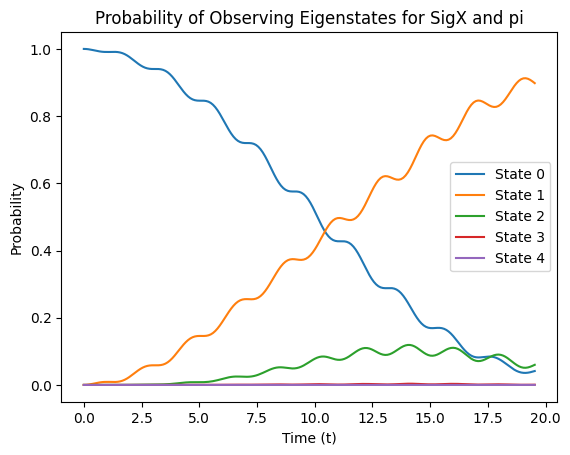

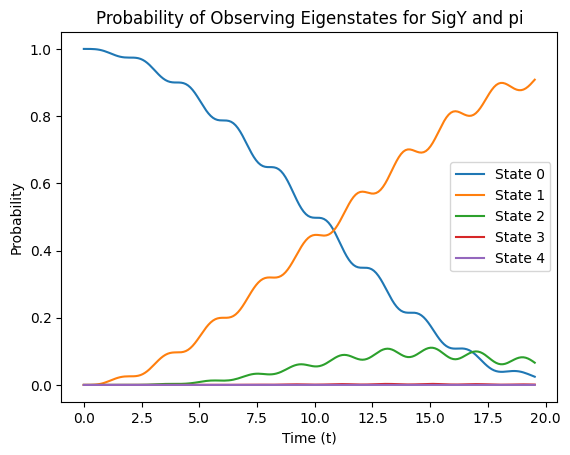

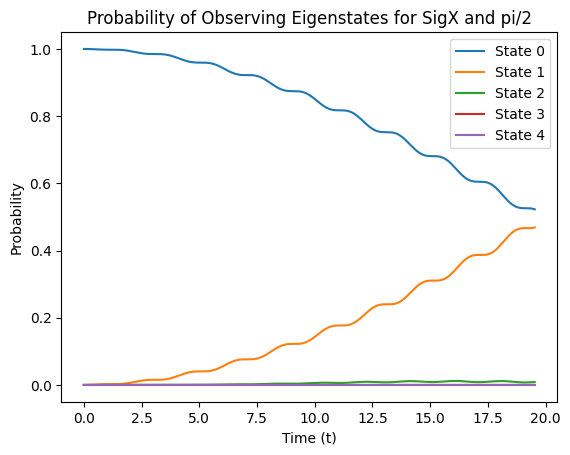

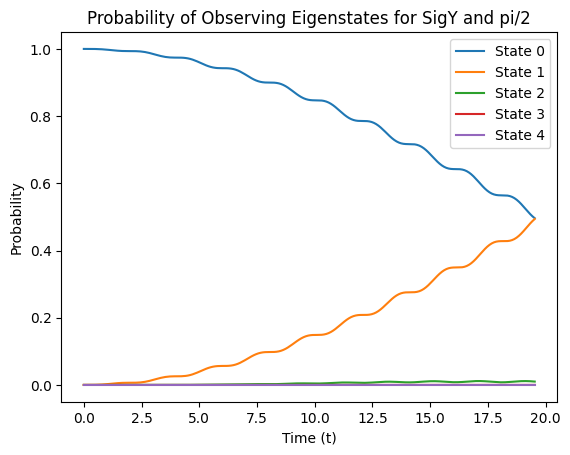

leak 0.009997852354713704


In [ ]:
phase_list = [0, np.pi/2]
theta_list = [np.pi, np.pi/2]
leakage = []

for theta in theta_list:
    for phase in phase_list:
        T = 19.529591836734696
        V0 = theta / (np.abs(x01) * T)
        phi = phase
        tlist = np.linspace(0, T, 200)

        args = {"V0": V0, "wd": wd, "phi": phi}

        # time evolve
        H = [H0, [x_op, drive]]
        projs = [eigenstates[n] * eigenstates[n].dag() for n in range(5)]
        psi_t = qt.sesolve(H, eigenstates[0], tlist, args=args, e_ops=projs)
        probs = np.array(psi_t.expect)

        leakage.append(psi_t.expect[2][-1] + psi_t.expect[3][-1] + psi_t.expect[4][-1])

        if phase == 0:
            gate = "SigX"
        else:
            gate = "SigY"

        if theta == np.pi:
            rotation = "pi"
        else:
            rotation = "pi/2"

        plt.title(f"Probability of Observing Eigenstates for {gate} and {rotation}")
        plt.ylabel("Probability")
        plt.xlabel("Time (t)")
        for i in range(5):
            plt.plot(tlist, probs[i], label=f"State {i}")
        plt.legend()
        plt.show()

Problem 8 Part B

In [148]:
print(f"X-Axis Leakage with pi rotation: {leakage[0]}")
print(f"Y-Axis Leakage with pi rotation: {leakage[1]}")
print(f"X-Axis Leakage with pi/2 rotation: {leakage[2]}")
print(f"Y-Axis Leakage with pi/2 rotation: {leakage[3]}")

X-Axis Leakage with pi rotation: 0.014085357179972363
Y-Axis Leakage with pi rotation: 0.009668443640939337
X-Axis Leakage with pi/2 rotation: 0.001760880363571874
Y-Axis Leakage with pi/2 rotation: 0.0012198204638138976


Problem 8 Part C

In [171]:
# THESE ARE THE ANSWERS FOR PART C <-----------------------------------------------------
print(f"X-Axis Leakage under 0.01 with pi rotation fatest time: 68.34583333333333")
print(f"Y-Axis Leakage under 0.01 with pi rotation fatest time: 54.104166666666664")
print(f"X-Axis Leakage under 0.01 with pi/2 rotation fatest time: 18.725")
print(f"Y-Axis Leakage under 0.01 with pi/2 rotation fatest time: 19.529591836734696")
# ---------------------------------------------------------------------------------------

bigTlist = np.linspace(19.5, 19.55, 50)
phase = np.pi/2
theta = np.pi/2
best = None
projs = [eigenstates[n] * eigenstates[n].dag() for n in range(5)]

for T in bigTlist:
    V0 = theta / (np.abs(x01) * T)
    tlist = np.linspace(0, T, 200)
    args = {"V0": V0, "wd": wd, "phi": phase}

    # time evolve
    H = [H0, [x_op, drive]]
    psi_t = qt.sesolve(H, eigenstates[0], tlist, args=args, e_ops=projs)
    probs = np.array(psi_t.expect)

    leak = psi_t.expect[2][-1] + psi_t.expect[3][-1] + psi_t.expect[4][-1]

    if leak <= 0.01:
        if (best is None) or (T < best[0]):
            best = (T, V0, leak)

print()
print(f"Min T with leakage less than 0.01 T={best[0]} V0={best[1]} leak={best[2]}")

X-Axis Leakage under 0.01 with pi rotation fatest time: 68.34583333333333
Y-Axis Leakage under 0.01 with pi rotation fatest time: 54.104166666666664
X-Axis Leakage under 0.01 with pi/2 rotation fatest time: 18.725
Y-Axis Leakage under 0.01 with pi/2 rotation fatest time: 19.529591836734696

Min T with leakage less than 0.01 T=19.529591836734696 V0=0.14254581030942812 leak=0.009997852354713704
